In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set plotting style and size
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
# Load the dataset
df = pd.read_csv('train.csv')

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


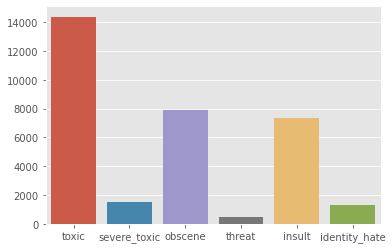

In [4]:
# Visualize the distribution of toxic labels
cols_target = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
x = df[cols_target].sum().index
y = df[cols_target].sum()
sns.barplot(x, y)
plt.show()

In [5]:
def clean_text(text):
    text =  text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"r", "", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"[-()#/@;:{}`+=~|.!?,]", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub("(\W)"," ",text)
    text = re.sub('S*dS*s*','', text)
    return text

In [6]:
# Apply text cleaning to the 'comment_text' column
df["text"] = df['comment_text'].apply(lambda text: clean_text(text))

# Correct the lambda function to close the parenthesis
df['clean_text'] = df['comment_text'].apply(lambda text: clean_text(text))

# Now you can access 'clean_text' column
df[['comment_text', 'clean_text']].head(2)


,comment_text,clean_text
0,Explanation\nWhy the edits made under my usern...,explanation why the eits mae une my usename ha...
1,D'aww! He matches this background colour I'm s...,aww he matches this backgoun colou i am seemin...


In [7]:
cols_target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
X_train, X_test, y_train, y_test = train_test_split(df['text'], df[cols_target], test_size=0.3)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105074,)
(105074, 6)
(45033,)
(45033, 6)


In [9]:
vect = TfidfVectorizer(
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'w{1,}',
    ngram_range=(1, 3),
    stop_words='english',
    sublinear_tf=True)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['w'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [10]:
# Model training using Multinomial Naive Bayes
model = OneVsRestClassifier(MultinomialNB())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
# Assess overall model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=cols_target))

threshold_values = [0.3, 0.4, 0.5, 0.6, 0.7]  # Adjust as needed
for threshold in threshold_values:
    y_pred_adjusted = (y_pred >= threshold).astype(int)
    print(f"\nThreshold: {threshold}")
    print("Classification Report:\n", classification_report(y_test, y_pred_adjusted, target_names=cols_target, zero_division=1))


Accuracy: 0.8984078342548798
Classification Report:
                precision    recall  f1-score   support

        toxic       0.40      0.00      0.00      4288
 severe_toxic       0.00      0.00      0.00       464
      obscene       0.00      0.00      0.00      2392
       threat       0.06      0.01      0.01       146
       insult       0.17      0.00      0.00      2213
identity_hate       0.00      0.00      0.00       397

    micro avg       0.06      0.00      0.00      9900
    macro avg       0.10      0.00      0.00      9900
 weighted avg       0.21      0.00      0.00      9900
  samples avg       0.00      0.00      0.00      9900


Threshold: 0.3
Classification Report:
                precision    recall  f1-score   support

        toxic       0.40      0.00      0.00      4288
 severe_toxic       0.00      0.00      0.00       464
      obscene       0.00      0.00      0.00      2392
       threat       0.06      0.01      0.01       146
       insult       0.1

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Compute confusion matrices for each class
cfs = []
for i in range(6):
    cf = np.asarray(confusion_matrix(y_test[cols_target[i]], y_pred[:, i]))
    cfs.append(cf)

In [13]:
# Define a function to print confusion matrices
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, c, fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    heatmap = sns.heatmap(df_cm, annot=True, cmap=c, fmt="d", cbar=False, ax=axes)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)

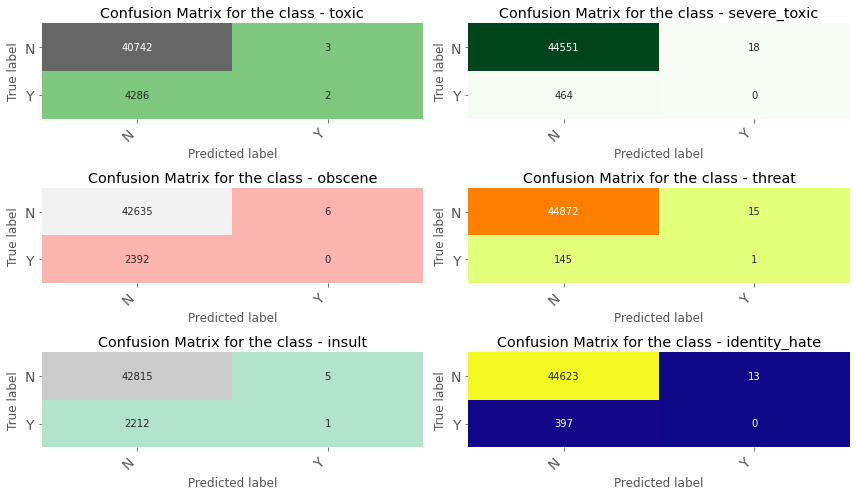

In [14]:
# Visualize confusion matrices
fig, ax = plt.subplots(3, 2, figsize=(12, 7))
cmaps = ['Accent', 'Greens', 'Pastel1', 'Wistia', 'Pastel2', 'plasma']
for axes, cfs_matrix, label, i in zip(ax.flatten(), cfs, cols_target, range(6)):
    c = cmaps[i]
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"], c, 14)
fig.tight_layout()
plt.show()

In [15]:
# Generate a classification report and visualize it with a heatmap
cr = pd.DataFrame(classification_report(y_test, y_pred, target_names=cols_target, output_dict=True)).T
cr['support'] = cr.support.apply(int)
cr.style.background_gradient(cmap='Pastel1')

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
toxic,0.400000,0.000466,0.000932,4288
severe_toxic,0.000000,0.000000,0.000000,464
obscene,0.000000,0.000000,0.000000,2392
threat,0.062500,0.006849,0.012346,146
insult,0.166667,0.000452,0.000901,2213
identity_hate,0.000000,0.000000,0.000000,397
micro avg,0.062500,0.000404,0.000803,9900
macro avg,0.104861,0.001295,0.002363,9900
weighted avg,0.211430,0.000404,0.000787,9900
samples avg,0.000019,0.000050,0.000024,9900


In [16]:
# Define a function to make predictions on new comments
def make_test_predictions(df, classifier):
    df.comment_text = df.comment_text.apply(clean_text)
    X_test = df.comment_text
    X_test_transformed = vect.transform(X_test)
    y_test_pred = classifier.predict_proba(X_test_transformed)
    a = np.array(y_test_pred[0])
    sns.barplot(x=cols_target, y=a*100)
    plt.ylim((0, 100))
    result = sum(y_test_pred[0])
    if result >= 1:
        plt.title('The comment is Toxic')
    else:
        plt.title('The comment is Non Toxic')

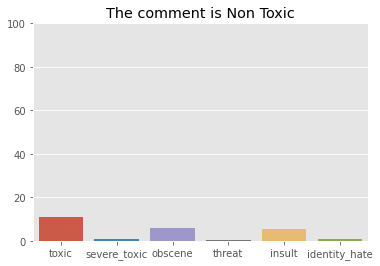

In [17]:
# Example usage of make_test_predictions with a new comment
comment_text = "how can you say that stupid"
comment = {'id': [1], 'comment_text': [comment_text]}
comment = pd.DataFrame(comment)
make_test_predictions(comment, model)

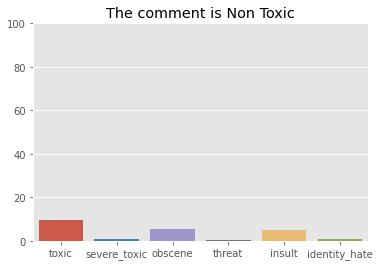

In [18]:
comment_text = "You are a good musician"
comment = {'id': [1], 'comment_text': [comment_text]}
comment = pd.DataFrame(comment)
make_test_predictions(comment, model)